In [1]:
#ライブラリをダウンロード
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#乱数シードを設定
np.random.seed(0)

In [3]:
#利用したい特徴量の数を指定
number_of_features = 10000

In [4]:
#データ変換
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [5]:
#データをダウンロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [6]:
# restore np.load for future normal usage
np.load = np_load_old

In [7]:
#映画批評のデータをワンホットエンコードして特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [8]:
#ニューラルネットワークの作成を開始
network = models.Sequential()

In [9]:
#活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,activation="relu",input_shape=(number_of_features,)))

In [10]:
#活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

In [11]:
#活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

In [12]:
#ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [13]:
#ニューラルネットワークを訓練
history = network.fit(features_train,target_train,epochs=15,verbose=0,batch_size=1000,validation_data=(features_test, target_test))

In [14]:
#訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [15]:
#エポック数のリストを作成
epoch_count =range(1, len(training_loss) + 1)

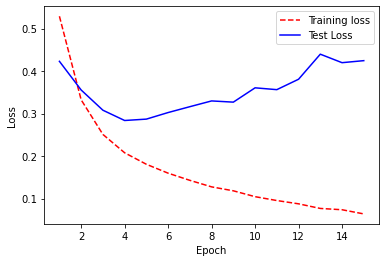

In [16]:
#ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

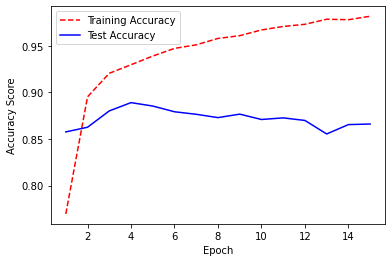

In [19]:
#訓練精度とテスト精度の経過を取得
training_accuracy = history.history["acc"]
test_accuracy = history.history["val_acc"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [20]:
np.load

<function numpy.load(file, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')>

In [21]:
data_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [22]:
features_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])